<a href="https://colab.research.google.com/github/TriggerRao/ML_datasets/blob/main/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [3]:
# word_index = reuters.get_word_index()                #converts back the data indices to the actual sentence
# reverse_word_index = dict(
#     [(value, key) for (key, value) in word_index.items()])
# decoded_newswire = " ".join(
#     [reverse_word_index.get(i-3, "? ") for i in train_data[0]])     #starts from 3 as 1 for padding, 2 for start of sequence and 3 for unknown

In [4]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    results[i, sequence] = 1.0
  return results
x_train = vectorize_sequences(train_data)       #vectorize the data using multi hot encoding
x_test = vectorize_sequences(test_data)

In [5]:
# def to_one_hot(labels, dimension = 46) :
#   results = np.zeros((len(labels), dimension))
#   for i, label in enumerate(labels):
#     results[i, label] = 1
#   return results              #one hot encodes labels
# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)          #another easier way to do the same thing as the abve block of code

In [7]:
from keras import Sequential
model = keras.Sequential([
    layers.Dense(64, activation ="relu"),
    layers.Dense(64, activation ="relu"),
    layers.Dense(46, activation ="softmax")     #softmax as multiple classification
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
x_val = x_train[:1000]            #choosing first 1000 examples for validation
partial_x_train = x_train[1000:]  #remaining sample for training
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20, batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.7086 - accuracy: 0.4851 - val_loss: 1.8013 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 1s 86ms/step - loss: 1.5093 - accuracy: 0.6768 - val_loss: 1.3594 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 81ms/step - loss: 1.1651 - accuracy: 0.7456 - val_loss: 1.2002 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.9593 - accuracy: 0.7918 - val_loss: 1.0779 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 80ms/step - loss: 0.7994 - accuracy: 0.8232 - val_loss: 1.0116 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 82ms/step - loss: 0.6679 - accuracy: 0.8550 - val_loss: 0.9870 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 1s 73ms/step - loss: 0.5615 - accuracy: 0.8763 - val_loss: 0.9462 - val_accuracy: 0.7940
Epoch 8/20
16

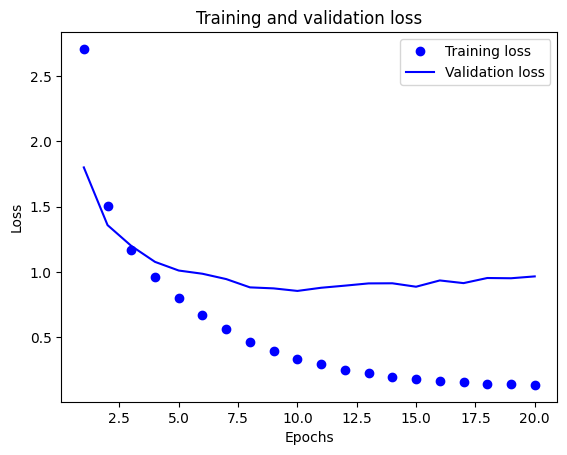

In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")        #calculates training and validation loss for the model
plt.legend()
plt.show()

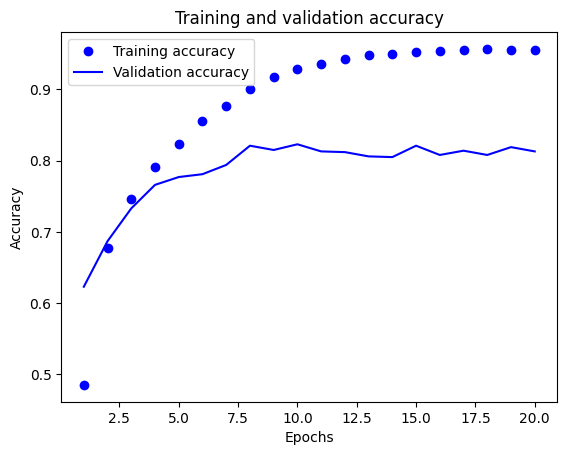

In [12]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")          #calculates training and validation accuracy for the model
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 4s 143ms/step - loss: 2.5028 - accuracy: 0.5426
Epoch 2/9
18/18 [==============================] - 2s 122ms/step - loss: 1.4143 - accuracy: 0.6941
Epoch 3/9
18/18 [==============================] - 1s 67ms/step - loss: 1.0953 - accuracy: 0.7622
Epoch 4/9
18/18 [==============================] - 2s 101ms/step - loss: 0.8903 - accuracy: 0.8101
Epoch 5/9
18/18 [==============================] - 2s 100ms/step - loss: 0.7324 - accuracy: 0.8405
Epoch 6/9
18/18 [==============================] - 2s 125ms/step - loss: 0.6050 - accuracy: 0.8720
Epoch 7/9
18/18 [==============================] - 2s 134ms/step - loss: 0.5030 - accuracy: 0.8945
Epoch 8/9
18/18 [==============================] - 1s 68ms/step - loss: 0.4206 - accuracy: 0.9105
Epoch 9/9
71/71 [==============================] - 1s 4ms/step - loss: 0.9018 - accuracy: 0.7943


In [15]:
results     #reaches a accuracy of ~80%

[0.9018305540084839, 0.7943009734153748]

In [16]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18521816562778273

In [17]:
prediction = model.predict(x_test)
prediction[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [18]:
###if we do not want to use one hot encoding in the test and train labels,
###we can directly convert them into vectors y_train and y_labels but in that case,
###we need to use sparse_categorical_crossentropy loss function instead of categorical